#Intro to Python using S&P Data

Welcome to MISSA X FS X AMI Collab! Today we'll be teaching you the basics of Python and how to visuzlize the S&P.
Led by: Jade Eng

#import Libraries

Install yfinance and the yfinance fixed version. Yfinance is an open source library that helps users access financial data easily. Yfinance fix is required because there are certain parts of yfinance that do not work without it. 

In [1]:
%pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install fix_yahoo_finance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7089 sha256=adcd3206639bff25f9c2efbf8314c46152cb1380779905e55c2df4aed02ae716
  Stored in directory: c:\users\mjdel\appdata\local\pip\cache\wheels\6d\7e\b6\6d0901b57b82e1c50b8e0527c664be867df7411cc2acb6cfea
Successfully built fix_yahoo_finance
Note: you may need to restart the kernel to use updated packages.


Here we're importing libraries. Libraries like the one below make Python easier to use. While you can hard code solutions, libraries allow us to call code that others have already developed in order to do what we want with less lines of code.  Linked below are documentation of the libraries that we're using. <br>
pandas: used for working with relationsal data/databases https://pandas.pydata.org/docs/user_guide/index.html#user-guide <br>
yfinance: access financial data on yahoo finance. Because Yahoo made some modules unavailable, we also input fix_yahoo_finance <br>
pandas_datareader: reads data from sources like Yahoo: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
datetime:  <br>
matplotlib: generates visualizations/plots: https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting <br>

In [3]:
import pandas as pd
import yfinance as yf
import fix_yahoo_finance 
import fix_yahoo_finance as yf2
import datetime
import matplotlib.pyplot as plt


c:\Users\mjdel\anaconda3\Lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



It's best to use documentation, but if you don't want to easily query what you can do, run the cell below.

In [4]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    const
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builtins.object


#Downloading Data

#S&P Wiki

What are your options for loading dataframes? <br>
Downloading CSV/ Excel files, webscraping, using libraries. We'll demonstrate the latter two today. 
<br>
Where can you find relevant CSV files? Kaggle: https://www.kaggle.com/. You must login with a google account in order to download files
<br>
Here we scrape this wikipedia page for the companies in the S&P. Web scraping can become more advanced and turns into another form called web-crawling where it searches the web for multiple locations. 


To start this workshop, we'll set a wikipedia link of 500 companies in the S&P to a variable. You can name the variable whatever you'd like.
<br>
Next we'll use pandas (pd) to read the html file of the wikipedia page and set it to a variable. After we set it to a variable, we'll call the variable to see what it looks like. 

In [5]:
sp_wiki="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
df_sp_wiki_list=pd.read_html(sp_wiki)
df_sp_wiki_list


[    Symbol              Security             GICS Sector  \
 0      MMM                    3M             Industrials   
 1      AOS           A. O. Smith             Industrials   
 2      ABT                Abbott             Health Care   
 3     ABBV                AbbVie             Health Care   
 4      ACN             Accenture  Information Technology   
 ..     ...                   ...                     ...   
 498    YUM           Yum! Brands  Consumer Discretionary   
 499   ZBRA    Zebra Technologies  Information Technology   
 500    ZBH         Zimmer Biomet             Health Care   
 501   ZION  Zions Bancorporation              Financials   
 502    ZTS                Zoetis             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  Date added  \
 0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
 1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
 2                 Heal

Notice that the form that this returns us isn't very visually pleasing. It has all the information we need, but it is not easily accessible. What we'd like to do instead is turn it into a table that pandas can access so we can better analyze the data. <br>
To do so, we'll turn df_sp_wiki_list into a table and then call the first ten columns to see what the result looks like. 

In [6]:
df_sp_wiki=df_sp_wiki_list[0]
df_sp_wiki.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADM,ADM,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
6,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,ADP,ADP,Industrials,Human Resource & Employment Services,"Roseland, New Jersey",1981-03-31,8670,1949
8,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
9,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955


Data types are important as they determine what you can combine together in tables using math etc. Additionally when putting items into a list, array, the objects that are put in must be of the same data type. Similarly, each column in a table must have the same data types. <br>
Data Types: integers, floats, characters, strings, arrays, booleans, dates
<br>
integers: -1, 0, 1, 2 
<br> floats: 0.0 -1.3, 4.298 
<br> characters: 'c', 'h', 'z'
<br> strings: 'hello my name is', 'Welcome to MISSA!', 'Today's date is 10/27. Have a wonderful day!'
<br>arrays: int arr[5]= {1, 5, 2018, 9, 3}, int arr[]={}, etc.
<br>boolean: True, False 
<br>dates: 2022-10-27, datetime(2022, 10, 27)

Because this is a scraped file, most of these return 'Object' which tells us little about the actual datatype that's in there. Looking at the table again, it appears as though we can assume most of the columns are strings and since it was put into a table, python may not 

In [7]:
df_sp_wiki.dtypes

Symbol                   object
Security                 object
GICS Sector              object
GICS Sub-Industry        object
Headquarters Location    object
Date added               object
CIK                       int64
Founded                  object
dtype: object

What if we just want to return the headers of this table?

In [8]:
df_sp_wiki.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')

Let's see the unique values of the GICS sector by using one of the functions that pandas has in their library. Note that since we put 'GICS sector' into square brackets, it returns us an array.

In [9]:
df_sp_wiki['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials',
       'Consumer Discretionary', 'Materials', 'Real Estate',
       'Communication Services', 'Energy'], dtype=object)

Let's determine the number of values in each sector by counting the number of 'Symbol' that belond to each category. 

In [10]:
df=df_sp_wiki.groupby('GICS Sector')['Symbol'].nunique()
df

GICS Sector
Communication Services    22
Consumer Discretionary    53
Consumer Staples          38
Energy                    23
Financials                72
Health Care               64
Industrials               77
Information Technology    64
Materials                 29
Real Estate               31
Utilities                 30
Name: Symbol, dtype: int64

Let's save the unique values of 'GICS Sector' into a list. 

In [11]:
industry = list(pd.unique(df_sp_wiki['GICS Sector']))

In [12]:
industry

['Industrials',
 'Health Care',
 'Information Technology',
 'Consumer Staples',
 'Utilities',
 'Financials',
 'Consumer Discretionary',
 'Materials',
 'Real Estate',
 'Communication Services',
 'Energy']

Let's make the list that we just saved into a pie chart using matplotlib. 
<br> Remember that we already have imported the matplotlib library and called it plt



<function matplotlib.pyplot.show(close=None, block=None)>

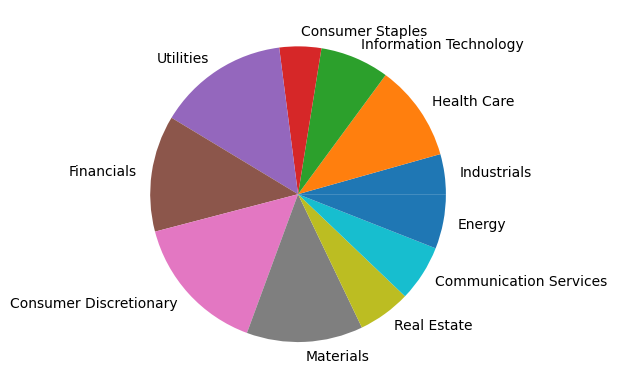

In [13]:
plt.pie(df, labels=industry)
plt.show

What if we want to show the percent of each section on the graph itself?

<function matplotlib.pyplot.show(close=None, block=None)>

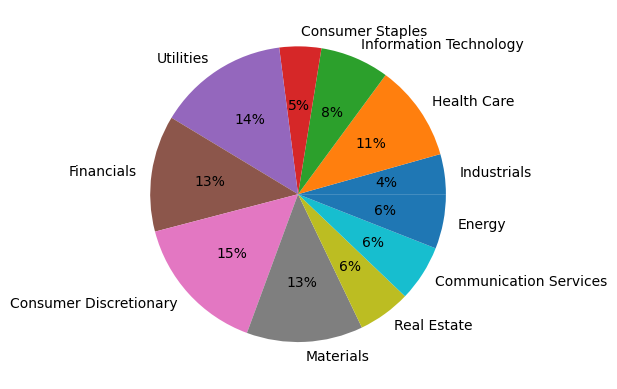

In [14]:
plt.pie(df, labels=industry, autopct='%.0f%%')
plt.show

Let's return all of the symbols in a list.

In [15]:
sp_ticker_list= list(df_sp_wiki['Symbol'].values)

In [16]:
sp_ticker_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADM',
 'ADBE',
 'ADP',
 'AES',
 'AFL',
 'A',
 'ABNB',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',


Hos do we detrmine the length of this list? Python has a prebuilt function called len that returns the length of any list. 

In [17]:
len(sp_ticker_list)

503

Let's take a look at Microsoft's stock prices using yfinance. 

In [18]:
yf.download('MSFT')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...
2023-10-11,331.209991,332.820007,329.140015,332.420013,332.420013,20063200
2023-10-12,330.570007,333.630005,328.720001,331.160004,331.160004,19313100
2023-10-13,332.380005,333.829987,326.359985,327.730011,327.730011,21072400


What if we want to call one of the built in functions for microsoft and return its dividends, or how much each stock returns to its; customer over a period of time? 
<br> It won't work because we haven't declared MSFT as a variable. We've only downloaded the information from yfinance. 

In [19]:
MSFT.dividends

NameError: name 'MSFT' is not defined

Let's save MSFT ticker information into a variable so we can call it's information. 

In [20]:
msft=yf.Ticker('MSFT')

In [21]:
msft.dividends

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
Name: Dividends, Length: 79, dtype: float64

Let's download multiple company's information into a dataframe.  

In [22]:
faang_df=yf.download("AMZN AAPL GOOG META", start="2017-01-01", end="2018-01-01")
faang_df.head(10)

[*********************100%%**********************]  4 of 4 completed


Adj Close                                        Close             \
                 AAPL       AMZN       GOOG        META       AAPL       AMZN   
Date                                                                            
2017-01-03  27.059315  37.683498  39.306999  116.860001  29.037500  37.683498   
2017-01-04  27.029020  37.859001  39.345001  118.690002  29.004999  37.859001   
2017-01-05  27.166473  39.022499  39.701000  120.669998  29.152500  39.022499   
2017-01-06  27.469334  39.799500  40.307499  123.410004  29.477501  39.799500   
2017-01-09  27.720938  39.846001  40.332500  124.900002  29.747499  39.846001   
2017-01-10  27.748888  39.794998  40.239498  124.349998  29.777500  39.794998   
2017-01-11  27.897993  39.951000  40.395500  126.089996  29.937500  39.951000   
2017-01-12  27.781509  40.681999  40.318001  126.620003  29.812500  40.681999   
2017-01-13  27.732588  40.856998  40.394001  128.339996  29.760000  40.856998   
2017-01-17  27.956240  40.486000  40.230499  127.870003  30.000000  40.486000   

                                        High             ...        Low  \
                 GOOG        META       AAPL       AMZN  ...       GOOG   
Date                                                     ...              
2017-01-03  39.306999  116.860001  29.082500  37.938000  ...  38.790001   
2017-01-04  39.345001  118.690002  29.127501  37.984001  ...  39.158001   
2017-01-05  39.701000  120.669998  29.215000  39.119999  ...  39.250999   
2017-01-06  40.307499  123.410004  29.540001  39.972000  ...  39.610199   
2017-01-09  40.332500  124.900002  29.857500  40.088501  ...  40.141499   
2017-01-10  40.239498  124.349998  29.844999  39.900002  ...  40.175499   
2017-01-11  40.395500  126.089996  29.982500  39.974998  ...  40.068501   
2017-01-12  40.318001  126.620003  29.825001  40.706501  ...  39.958500   
2017-01-13  40.394001  128.339996  29.905001  41.082500  ...  40.334499   
2017-01-17  40.230499  127.870003  30.059999  40.799999  ...  40.018501   

                             Open                                    \
                  META       AAPL       AMZN       GOOG        META   
Date                                                                  
2017-01-03  115.510002  28.950001  37.896000  38.940498  116.029999   
2017-01-04  117.290001  28.962500  37.919498  39.417999  117.550003   
2017-01-05  118.320000  28.980000  38.077499  39.304001  118.860001   
2017-01-06  120.029999  29.195000  39.118000  39.763000  120.980003   
2017-01-09  123.040001  29.487499  39.900002  40.320000  123.550003   
2017-01-10  124.279999  29.692499  39.830002  40.393002  124.820000   
2017-01-11  124.059998  29.684999  39.682999  40.250000  124.349998   
2017-01-12  124.800003  29.725000  40.015499  40.356998  125.610001   
2017-01-13  127.370003  29.777500  40.716000  40.374001  127.489998   
2017-01-17  127.400002  29.584999  40.785000  40.354000  128.039993   

               Volume                                 
                 AAPL       AMZN      GOOG      META  
Date                                                  
2017-01-03  115127600   70422000  33146000  20663900  
2017-01-04   84472400   50210000  21460000  19630900  
2017-01-05   88774400  116602000  26704000  19492200  
2017-01-06  127007600  119724000  32804000  28545300  
2017-01-09  134247600   68922000  25492000  22880400  
2017-01-10   97848400   51168000  23536000  17324600  
2017-01-11  110354400   59856000  21318000  18356500  
2017-01-12  108344800   97478000  27062000  18653900  
2017-01-13  104447600   75838000  21984000  24884300  
2017-01-17  137759200   73410000  27242000  15294500  

[10 rows x 24 columns]

Notice that the table above has information grouped by adj close, close, low and high instead of ticker symbols. If you want, run the code below to see how you can group the table by ticker tymbol instead.

In [23]:
faang_df2=yf.download("AMZN AAPL GOOG META", start="2017-01-01", end="2018-01-01", groupby='tickers')
faang_df2.head(10)

TypeError: download() got an unexpected keyword argument 'groupby'

Notice that calling the pandas columns function for both of these don't return a clean list. Instead they have two key values for each item in the column. 

In [24]:
faang_df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'GOOG'),
            ('Adj Close', 'META'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'GOOG'),
            (    'Close', 'META'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'GOOG'),
            (     'High', 'META'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'GOOG'),
            (      'Low', 'META'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'GOOG'),
            (     'Open', 'META'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'GOOG'),
            (   'Volume', 'META')],
           )

Let's make this more easily understandable by saving all of the Close information into a variable and see what it looks like now. 

In [25]:
close=faang_df.Close
close

,AAPL,AMZN,GOOG,META
Date,,,,
2017-01-03,29.037500,37.683498,39.306999,116.860001
2017-01-04,29.004999,37.859001,39.345001,118.690002
2017-01-05,29.152500,39.022499,39.701000,120.669998
2017-01-06,29.477501,39.799500,40.307499,123.410004
2017-01-09,29.747499,39.846001,40.332500,124.900002
...,...,...,...,...
2017-12-22,43.752499,58.417999,53.006001,177.199997
2017-12-26,42.642502,58.838001,52.837002,175.990005
2017-12-27,42.650002,59.112999,52.468498,177.619995


Let's get some descriptive statistics on this dataframe. Describe gives us statistical information that you need in order to analyze datasets, but we can go over this more in a different workshop. 

In [26]:
close.describe()

,AAPL,AMZN,GOOG,META
count,251.000000,251.000000,251.000000,251.000000
mean,37.637769,48.408351,46.089042,156.576175
std,3.655298,5.329010,3.861628,17.379058
min,29.004999,37.683498,39.306999,116.860001
25%,35.453751,44.451250,41.849751,141.000000
50%,38.185001,48.399502,46.478500,153.610001
75%,39.963751,50.148500,48.638000,171.974998
max,44.105000,59.791500,53.856998,183.029999


To create a graph of close, run the following code and compare the four companies that we put in the list. Fig size changes the size of the graph, if you don't want to make it bigger, don't put figsize in the parentheses. 

<Axes: xlabel='Date'>

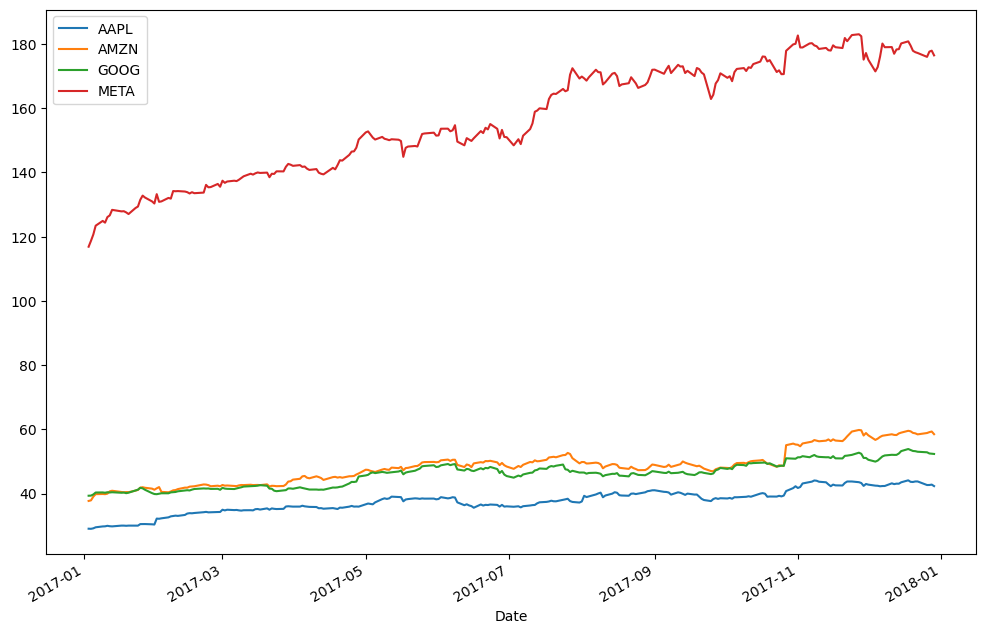

In [27]:
close.plot(figsize=(12,8))